# Multiple Linear Regression

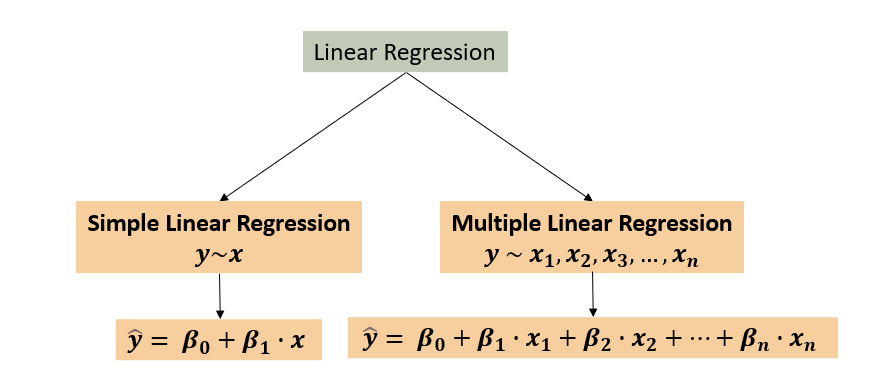

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

## Step 1: Read the dataset

In [2]:
import pandas as pd 
df = pd.read_csv("50_Startups.csv")
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### PROFIT ~ RND, ADMIN, MKT
### PROFIT = B0 + B1 x RND + B2 x ADMIN + B3 x MKT

### Step 2: Perform basic data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

### No missing values and no duplicate values for above data

### Step 3: Seperate X(RND, ADMIN, MKT) and Y(PROFIT)
Profit ~ RND, ADMIN, MKT

In [6]:
X = df[["RND", "ADMIN", "MKT"]]
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [8]:
Y = df[["PROFIT"]]
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


### Step 4: Build Linear Regression Model

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()
model.fit(X, Y)

LinearRegression()

In [11]:
model.intercept_

array([50122.19298987])

In [12]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

In [13]:
X.columns

Index(['RND', 'ADMIN', 'MKT'], dtype='object')

In [16]:
c = pd.Series(model.coef_.flatten(), index=X.columns)
c

RND      0.805715
ADMIN   -0.026816
MKT      0.027228
dtype: float64

<Axes: >

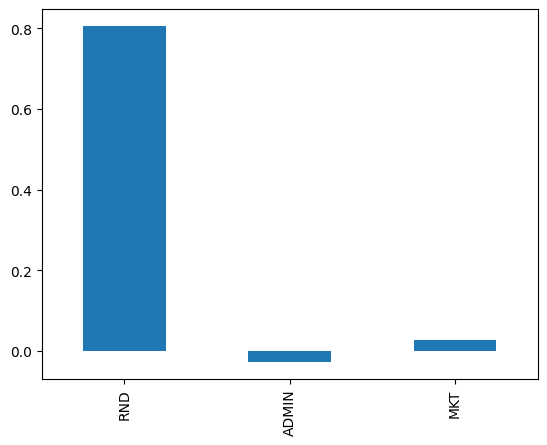

In [17]:
c.plot(kind="bar")

### From above results i can conclude RND is impacting profit the most

### PROFIT_est = 50122.19 + 0.8057 x RND - 0.0268 x ADMIN +  0.0272 x MKT

In [18]:
model.score(X, Y)

0.9507459940683246